<h4 style="color:tomato"> Author : Pramil Paudel  <br> <br>
 In Partial fullfillment of "Introduction to data science </h4>
 
 [data]:https://media-exp1.licdn.com/dms/image/C4D03AQEc1tEytx6FrA/profile-displayphoto-shrink_400_400/0?e=1607558400&v=beta&t=pmxUWqXB0FlwQXi96LytH7GYYkph9sVJ4vXhEfcPikQ "Author"

![alt text][data]
- `Author : Pramil Paudel` <br> 
- `Subject : Introduction to data science` <br>
***
This project is about forcasting demand of particular product based on 'historical_data'. From an eagle eye point of view data contains total amount of order of a product. <br>

Including some packages we are going to implement in the product.

- Pandas
- Sklearn

Importing required packages. The required packages can be written in the cell itself but I like them to be at the top of the project file. I am code driven but we can write anywhere locally in notebook.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.display import Image
import pydotplus
print("Loading required packages !!! ")      

Loading required packages !!! 


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<p style='color : tomato'>I have separated sklearn packages, its beacuse these packages often provide Classifier, Regression, Clustering model we use in the code. A fact is some of the packages are never used in the project but packages are still there, we can optimize import too</p>

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn import metrics  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn import preprocessing  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
print("SK LEARN LOADED !!")

SK LEARN LOADED !!


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Lets read the data from each of the file and try to get more information as much as possible. This code cell is reading data from each of the file and displaying the header information along with 2 lines of data. Only two lines of the code are printed as our intension is to look around the data pattern only. This has to be crossed checked if data contains any null values or not. How enconding can be done for string attributes. 


There are different types of files in this data set. Some files are with less or no anomaly data but some contains large amount of anomaly data. I am loading two/three files out of these files and check against each other. 

#### 1. Reading Anomalous data 

In [3]:
## Loading all data in four different pandas dataframe 
## Printing the data 
PROJECT_ROOT_DORECTORY = '~/Documents/FALL_2020/INTRO_DATASCIENCE/WEEKLY_PROJECT/week_six/data'
raw_df_anamoly = pd.read_csv(PROJECT_ROOT_DORECTORY+"/artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv")
raw_df_anamoly.head()

,timestamp,value
0,2014-04-01 00:00:00,-21.048383
1,2014-04-01 00:05:00,-20.295477
2,2014-04-01 00:10:00,-18.127229
3,2014-04-01 00:15:00,-20.171665
4,2014-04-01 00:20:00,-21.223762


#### Lets check the shape of this data frame. There are supposed be same amount of data rows. But lets check.

In [28]:
raw_df_anamoly.shape

(4032, 2)

It means there are 4032 rows of data with different columns.

#### 2. Lets read data with Anomalous data

In [4]:
raw_df_no_anamoly = pd.read_csv(PROJECT_ROOT_DORECTORY+"/artificialNoAnomaly/artificialNoAnomaly/art_daily_no_noise.csv")
raw_df_no_anamoly.head()

,timestamp,value
0,2014-04-01 00:00:00,20.0
1,2014-04-01 00:05:00,20.0
2,2014-04-01 00:10:00,20.0
3,2014-04-01 00:15:00,20.0
4,2014-04-01 00:20:00,20.0


In [5]:
raw_df_anamoly.describe()

,value
count,4032.000000
mean,18.981142
std,45.374171
min,-21.998789
25%,-19.929162
50%,-17.541296
75%,74.425223
max,87.958348


In [6]:
raw_df_anamoly.shape

(4032, 2)

It Means either of the data files contains 4032 rows of data. These data are different and are anomalous. We can check this using some anomoly detection algorithms

### Scatter Plot

### 1. Lets Plot 'raw_df_anamoly' and see the location of different data points

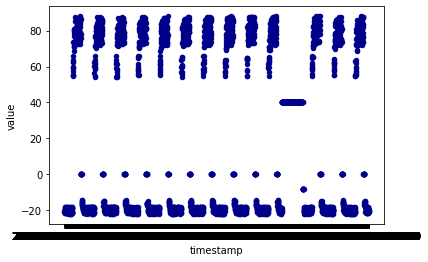

In [7]:
raw_df_anamoly.plot.scatter(x='timestamp',y='value', c='DarkBlue')

In [8]:
raw_df_no_anamoly.shape

(4032, 2)

### 2. Lets Plot 'raw_df_no_anamoly' and see the distribution of different data points

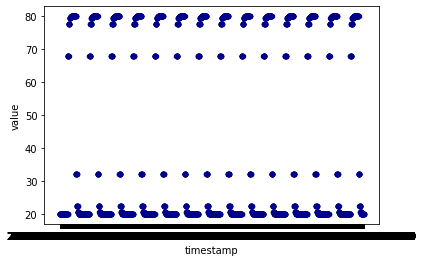

In [9]:
raw_df_no_anamoly.plot.scatter(x='timestamp',y='value', c='DarkBlue')

### One more source file : there is file with flat data points too. Lets see the distributio of this data too.

From above scatter plot we can some of the outlier in the data with anamoly

In [10]:
raw_df_flat_line = pd.read_csv(PROJECT_ROOT_DORECTORY+"/artificialNoAnomaly/artificialNoAnomaly/art_flatline.csv")
raw_df_flat_line.head()

,timestamp,value
0,2014-04-01 00:00:00,45.0
1,2014-04-01 00:05:00,45.0
2,2014-04-01 00:10:00,45.0
3,2014-04-01 00:15:00,45.0
4,2014-04-01 00:20:00,45.0


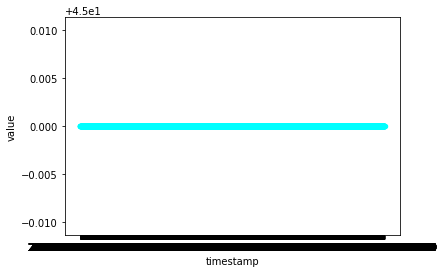

In [11]:
raw_df_flat_line.plot.scatter(x='timestamp',y='value', c='cyan')

#### From all these discussion and exploration we found that files contains different types of data. We can get some pattern while traning anonaly detection algorithms and see if the data points being processed is outlier or not.

It means if we train our model with flat data, then other rest of the data is going to be outlier as these data points are not going to be matching with the pattern we have in traning data set. 

Lets train 2 differnt anomaly detecting model with no anomaly dataFrame and check it against the anomaly data. They will assign values -1 and 1 for matching and not matching data.

## 1. One Class SVM

It will help to classify data in refrence to the training data set. If data is different than training data set, it give result as -1 else as 1. So values contaning -1 are outliers

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import datetime as dt

raw_df_no_anamoly['timestamp'] = pd.to_datetime(raw_df_no_anamoly['timestamp']).map(dt.datetime.toordinal)
raw_df_anamoly['timestamp'] = pd.to_datetime(raw_df_anamoly['timestamp']).map(dt.datetime.toordinal)
X_train = raw_df_no_anamoly
X_test = raw_df_anamoly


# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
train_pred_df = pd.DataFrame(data=y_pred_train, columns=["SVM_score"])

y_pred_test = clf.predict(X_test)
test_pred_df = pd.DataFrame(data=y_pred_test, columns=["SVM_score"])

n_error_train = y_pred_train[y_pred_train == -1].size
print("The size of outliers in training data is ------ " + str(n_error_train))
n_error_test = y_pred_test[y_pred_test == -1].size
print("The size of outliers in test data is ---------- " + str(n_error_test))

The size of outliers in training data is ------ 792
The size of outliers in test data is ---------- 3846


It means there are around 792 outlier in the dataset we feed to train itself, while there are 3846 numbers of anomalous data in the anomolous dataFrame. We can create new dataFrame from the prediction and merge it to original dataFrame. Thereby we can create a scatter plot with different color set so that we can separate outlier from regular data.

Lets merge OneClass predicted data to original Data frame

In [13]:
merged_no_anamoly = raw_df_no_anamoly.merge(train_pred_df, left_index=True, right_index=True)
merged_no_anamoly.head()

,timestamp,value,SVM_score
0,735324,20.0,1
1,735324,20.0,1
2,735324,20.0,1
3,735324,20.0,1
4,735324,20.0,1


I passed the value of 'SVM_score' to color params so that we can see different color for detected outliers.

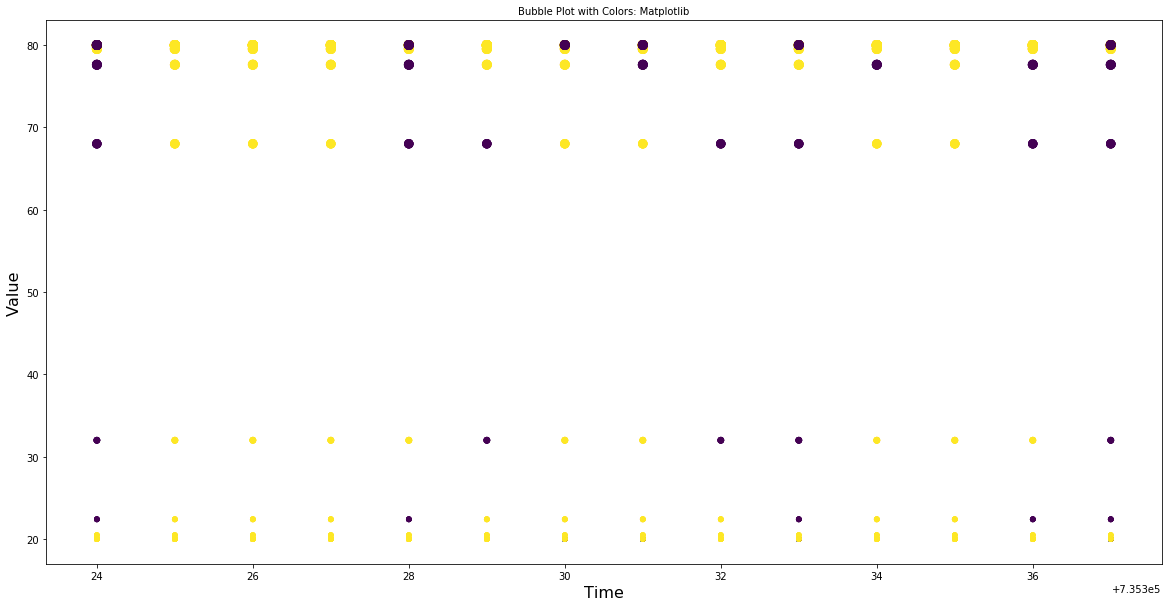

In [14]:
plt.figure(figsize=(20, 10))
plt.xlabel("Time", size=16)
plt.ylabel("Value", size=16)
plt.title("Bubble Plot with Colors: Matplotlib", size=10)
bubble_plot = plt.scatter('timestamp', 'value',s='value',c='SVM_score',alpha=0.5, data=merged_no_anamoly)

Similarly, lets merge the anomalous data and merge it to the prediction we got for the test data or lets say anomalous data

In [15]:
merged_anamoly = raw_df_anamoly.merge(test_pred_df, left_index=True, right_index=True)
merged_anamoly.head()

,timestamp,value,SVM_score
0,735324,-21.048383,-1
1,735324,-20.295477,-1
2,735324,-18.127229,-1
3,735324,-20.171665,-1
4,735324,-21.223762,-1


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


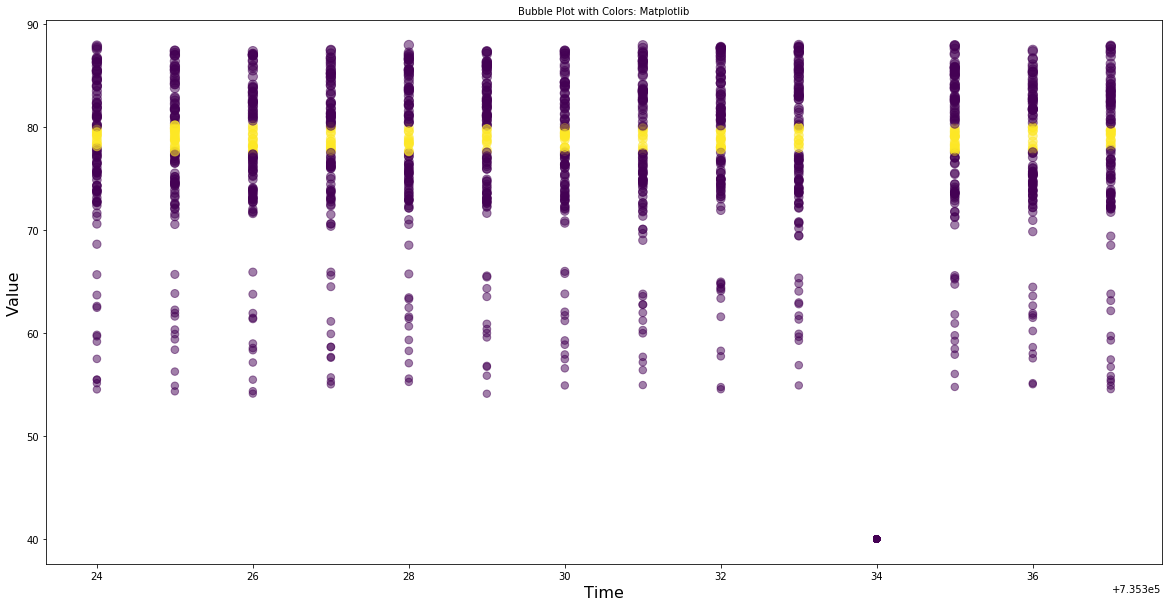

In [16]:
plt.figure(figsize=(20, 10))
plt.xlabel("Time", size=16)
plt.ylabel("Value", size=16)
plt.title("Bubble Plot with Colors: Matplotlib", size=10)
bubble_plot = plt.scatter('timestamp', 'value',s='value',c='SVM_score',alpha=0.5, data=merged_anamoly)


From above, we separated out the anomalous data from regular data to the model. We have to keep the log of which data was feed to the model and which data is being predicted for test.

## 2. Isolation Forest

As we did in One Class SVM we can also do similar comparision using Isolation Forest model too. For that I also used same Test/Train set to train and predict from the model

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=10, random_state=rng)


clf.fit(X_train)
y_pred_train = clf.predict(X_train)
train_pred_df = pd.DataFrame(data=y_pred_train, columns=["SVM_score"])

y_pred_test = clf.predict(X_test)
test_pred_df = pd.DataFrame(data=y_pred_test, columns=["SVM_score"])

print(y_pred_train)
print(y_pred_test)


n_error_train = y_pred_train[y_pred_train == -1].size
print("The size of outliers in training data is ------ " + str(n_error_train))
n_error_test = y_pred_test[y_pred_test == -1].size
print("The size of outliers in test data is ---------- " + str(n_error_test))

[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
The size of outliers in training data is ------ 2724
The size of outliers in test data is ---------- 2400


In [18]:
merged_no_anamoly = raw_df_no_anamoly.merge(train_pred_df, left_index=True, right_index=True)
merged_no_anamoly.head()

,timestamp,value,SVM_score
0,735324,20.0,1
1,735324,20.0,1
2,735324,20.0,1
3,735324,20.0,1
4,735324,20.0,1


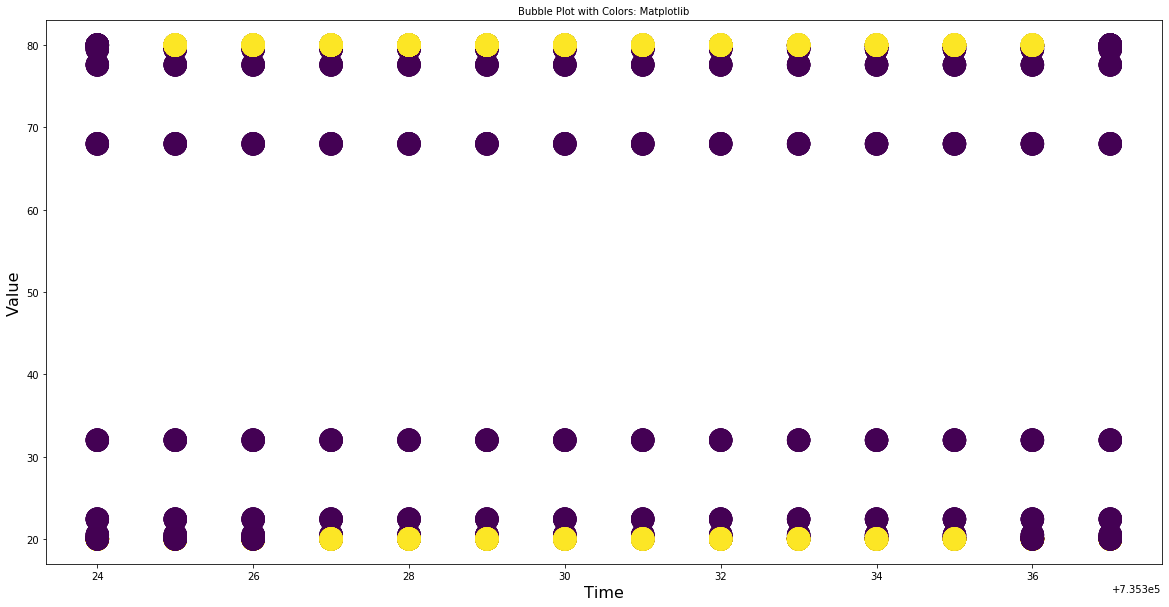

In [19]:
plt.figure(figsize=(20, 10))
plt.xlabel("Time", size=16)
plt.ylabel("Value", size=16)
plt.title("Bubble Plot with Colors: Matplotlib", size=10)
bubble_plot = plt.scatter('timestamp', 'value',s=500,c='SVM_score',alpha=0.5, data=merged_no_anamoly)


In [20]:
merged_anamoly = raw_df_anamoly.merge(test_pred_df, left_index=True, right_index=True)
merged_anamoly.SVM_score.unique()

array([ 1, -1])

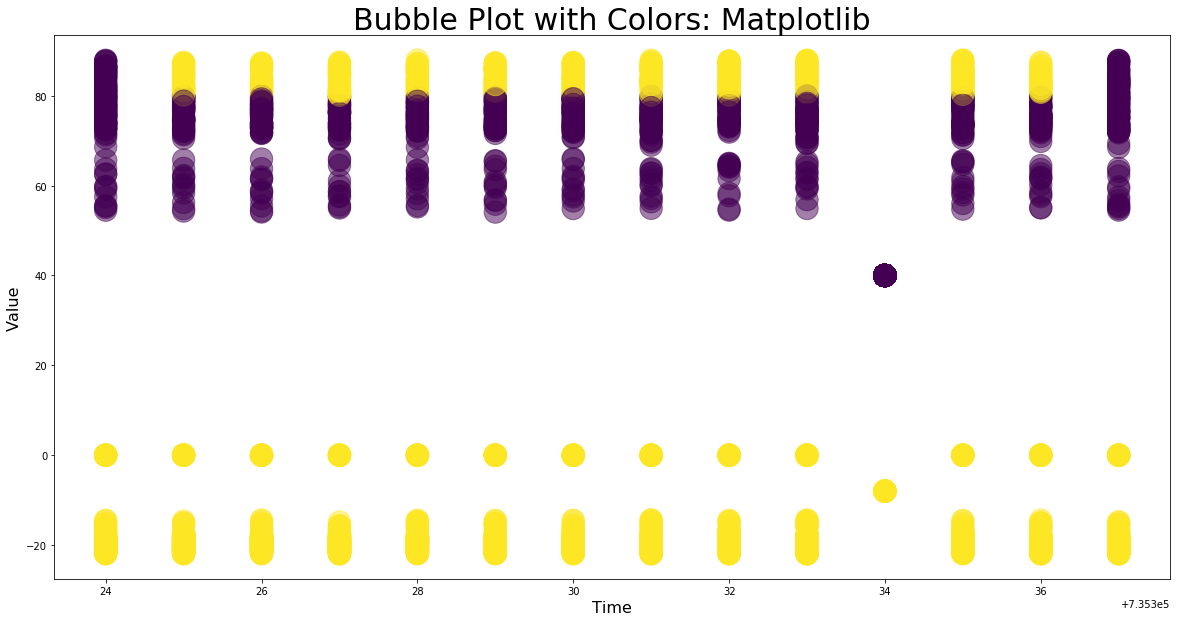

In [21]:
plt.figure(figsize=(20, 10))
plt.xlabel("Time", size=16)
plt.ylabel("Value", size=16)
plt.title("Bubble Plot with Colors: Matplotlib", size=30)
bubble_plot = plt.scatter('timestamp', 'value',s=500,c='SVM_score',alpha=0.5, data=merged_anamoly)


From the above chat I have found SVM working better than the Isolation Forest for anomaly detection in the project. We can use other data set to train our model and test it too.

### THANK YOU !! 